In [1]:
import seaborn as sns
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('crypto_data_updated_13_november.csv')

In [4]:
btc = yf.Ticker('BTC-USD')
prices1 = btc.history(period='5y')
prices1.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

eth = yf.Ticker('ETH-USD')
prices2 = eth.history(period='5y')
prices2.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

usdt = yf.Ticker('USDT-USD')
prices3 = usdt.history(period='5y')
prices3.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

bnb = yf.Ticker('BNB-USD')
prices4 = bnb.history(period='5y')
prices4.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

In [5]:
p1 = prices1.join(prices2, lsuffix = ' (BTC)', rsuffix = ' (ETH)')
p2 = prices3.join(prices4, lsuffix = ' (USDT)', rsuffix = ' (BNB)')
data = p1.join(p2, lsuffix = '_', rsuffix = '_')

In [6]:
data.head()

Close (BTC)  Volume (BTC)  Close (ETH)  \
Date                                                                
2018-12-12 00:00:00+00:00  3486.950195    4139364829    90.593300   
2018-12-13 00:00:00+00:00  3313.677246    4343372456    86.539314   
2018-12-14 00:00:00+00:00  3242.484863    4372763663    84.308296   
2018-12-15 00:00:00+00:00  3236.761719    3551763561    84.440811   
2018-12-16 00:00:00+00:00  3252.839111    3744248994    85.262100   

                           Volume (ETH)  Close (USDT)  Volume (USDT)  \
Date                                                                   
2018-12-12 00:00:00+00:00    1533050103      1.009756     2623601152   
2018-12-13 00:00:00+00:00    1754475622      1.003378     2657124589   
2018-12-14 00:00:00+00:00    1651491877      1.002197     2751719689   
2018-12-15 00:00:00+00:00    1496176898      1.004989     2191631708   
2018-12-16 00:00:00+00:00    1565817037      1.006336     2322330505   

                           Close (BNB)  Volume (BNB)  
Date                                                  
2018-12-12 00:00:00+00:00     5.023137      17783397  
2018-12-13 00:00:00+00:00     4.650704      14503435  
2018-12-14 00:00:00+00:00     4.533357      13544913  
2018-12-15 00:00:00+00:00     4.563012      12572161  
2018-12-16 00:00:00+00:00     4.645258      14565932

In [7]:
data.tail()

Close (BTC)  Volume (BTC)  Close (ETH)  \
Date                                                                 
2023-12-08 00:00:00+00:00  44166.601562   24421116687  2358.731934   
2023-12-09 00:00:00+00:00  43725.984375   17368210171  2341.175293   
2023-12-10 00:00:00+00:00  43779.699219   13000481418  2352.462646   
2023-12-11 00:00:00+00:00  41243.832031   40632672038  2224.578857   
2023-12-12 00:00:00+00:00  41933.445312   32152696832  2232.972900   

                           Volume (ETH)  Close (USDT)  Volume (USDT)  \
Date                                                                   
2023-12-08 00:00:00+00:00   12543458699      1.000124    48979635040   
2023-12-09 00:00:00+00:00   10613312823      1.000517    45714652119   
2023-12-10 00:00:00+00:00    7369608905      1.000044    32521476893   
2023-12-11 00:00:00+00:00   17989249470      0.999547    73473005079   
2023-12-12 00:00:00+00:00   13928696832      0.999980    59835576320   

                           Close (BNB)  Volume (BNB)  
Date                                                  
2023-12-08 00:00:00+00:00   238.915985     828993280  
2023-12-09 00:00:00+00:00   237.768600     856746249  
2023-12-10 00:00:00+00:00   239.733154     640133489  
2023-12-11 00:00:00+00:00   246.420868    1442275453  
2023-12-12 00:00:00+00:00   249.467575    1509235200

In [8]:
# data = data.drop(columns = ['Unnamed: 0'])

In [9]:
# data.head()

In [10]:
# data.to_csv('crypto prices.csv')

In [11]:
data.shape

(1827, 8)

In [12]:
original = data.iloc[-1, :]
data = data.iloc[:-1,:]

In [13]:
data

Close (BTC)  Volume (BTC)  Close (ETH)  \
Date                                                                 
2018-12-12 00:00:00+00:00   3486.950195    4139364829    90.593300   
2018-12-13 00:00:00+00:00   3313.677246    4343372456    86.539314   
2018-12-14 00:00:00+00:00   3242.484863    4372763663    84.308296   
2018-12-15 00:00:00+00:00   3236.761719    3551763561    84.440811   
2018-12-16 00:00:00+00:00   3252.839111    3744248994    85.262100   
...                                 ...           ...          ...   
2023-12-07 00:00:00+00:00  43292.664062   27635760671  2357.579590   
2023-12-08 00:00:00+00:00  44166.601562   24421116687  2358.731934   
2023-12-09 00:00:00+00:00  43725.984375   17368210171  2341.175293   
2023-12-10 00:00:00+00:00  43779.699219   13000481418  2352.462646   
2023-12-11 00:00:00+00:00  41243.832031   40632672038  2224.578857   

                           Volume (ETH)  Close (USDT)  Volume (USDT)  \
Date                                                                   
2018-12-12 00:00:00+00:00    1533050103      1.009756     2623601152   
2018-12-13 00:00:00+00:00    1754475622      1.003378     2657124589   
2018-12-14 00:00:00+00:00    1651491877      1.002197     2751719689   
2018-12-15 00:00:00+00:00    1496176898      1.004989     2191631708   
2018-12-16 00:00:00+00:00    1565817037      1.006336     2322330505   
...                                 ...           ...            ...   
2023-12-07 00:00:00+00:00   14766891042      1.000317    52213979484   
2023-12-08 00:00:00+00:00   12543458699      1.000124    48979635040   
2023-12-09 00:00:00+00:00   10613312823      1.000517    45714652119   
2023-12-10 00:00:00+00:00    7369608905      1.000044    32521476893   
2023-12-11 00:00:00+00:00   17989249470      0.999547    73473005079   

                           Close (BNB)  Volume (BNB)  
Date                                                  
2018-12-12 00:00:00+00:00     5.023137      17783397  
2018-12-13 00:00:00+00:00     4.650704      14503435  
2018-12-14 00:00:00+00:00     4.533357      13544913  
2018-12-15 00:00:00+00:00     4.563012      12572161  
2018-12-16 00:00:00+00:00     4.645258      14565932  
...                                ...           ...  
2023-12-07 00:00:00+00:00   232.977432     813730268  
2023-12-08 00:00:00+00:00   238.915985     828993280  
2023-12-09 00:00:00+00:00   237.768600     856746249  
2023-12-10 00:00:00+00:00   239.733154     640133489  
2023-12-11 00:00:00+00:00   246.420868    1442275453  

[1826 rows x 8 columns]

In [14]:
#check the shape of the dataframe
data.shape 

(1826, 8)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2018-12-12 00:00:00+00:00 to 2023-12-11 00:00:00+00:00
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Close (BTC)    1826 non-null   float64
 1   Volume (BTC)   1826 non-null   int64  
 2   Close (ETH)    1826 non-null   float64
 3   Volume (ETH)   1826 non-null   int64  
 4   Close (USDT)   1826 non-null   float64
 5   Volume (USDT)  1826 non-null   int64  
 6   Close (BNB)    1826 non-null   float64
 7   Volume (BNB)   1826 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 128.4 KB


In [16]:
data.isna().sum()

Close (BTC)      0
Volume (BTC)     0
Close (ETH)      0
Volume (ETH)     0
Close (USDT)     0
Volume (USDT)    0
Close (BNB)      0
Volume (BNB)     0
dtype: int64

In [17]:
data.describe()

Close (BTC)  Volume (BTC)  Close (ETH)  Volume (ETH)  Close (USDT)  \
count   1826.000000  1.826000e+03  1826.000000  1.826000e+03   1826.000000   
mean   24166.346113  2.885748e+10  1385.893413  1.419158e+10      1.001543   
std    16095.147945  1.829027e+10  1170.120410  1.003094e+10      0.004025   
min     3236.761719  3.551764e+09    84.308296  1.496177e+09      0.974248   
25%     9531.575928  1.684300e+10   227.599697  7.131225e+09      1.000042   
50%    21336.149414  2.567102e+10  1372.578003  1.176539e+10      1.000362   
75%    35765.008789  3.628123e+10  1938.872589  1.836960e+10      1.001586   
max    67566.828125  3.509679e+11  4812.087402  8.448291e+10      1.053585   

       Volume (USDT)  Close (BNB)  Volume (BNB)  
count   1.826000e+03  1826.000000  1.826000e+03  
mean    4.722346e+10   199.105257  1.084068e+09  
std     3.445012e+10   175.067522  1.404296e+09  
min     2.191632e+09     4.533357  1.257216e+07  
25%     2.205173e+10    21.985981  2.815626e+08  
50%     4.030993e+10   230.748360  5.192907e+08  
75%     6.184556e+10   313.960571  1.440974e+09  
max     2.790675e+11   675.684082  1.798295e+10

<Axes: xlabel='Date'>

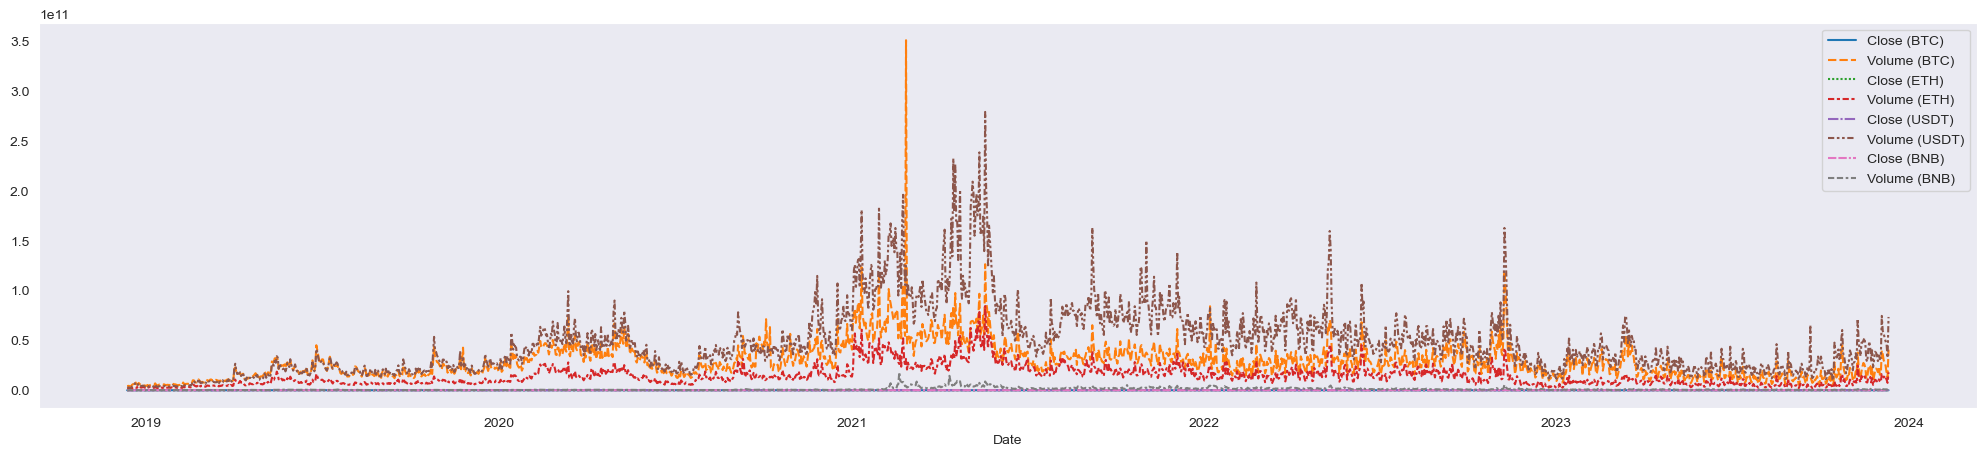

In [18]:
plt.figure(figsize = (25, 5))
sns.set_style('dark')
sns.lineplot(data=data)

Text(0.5, 1.0, 'Adjacent Close Price')

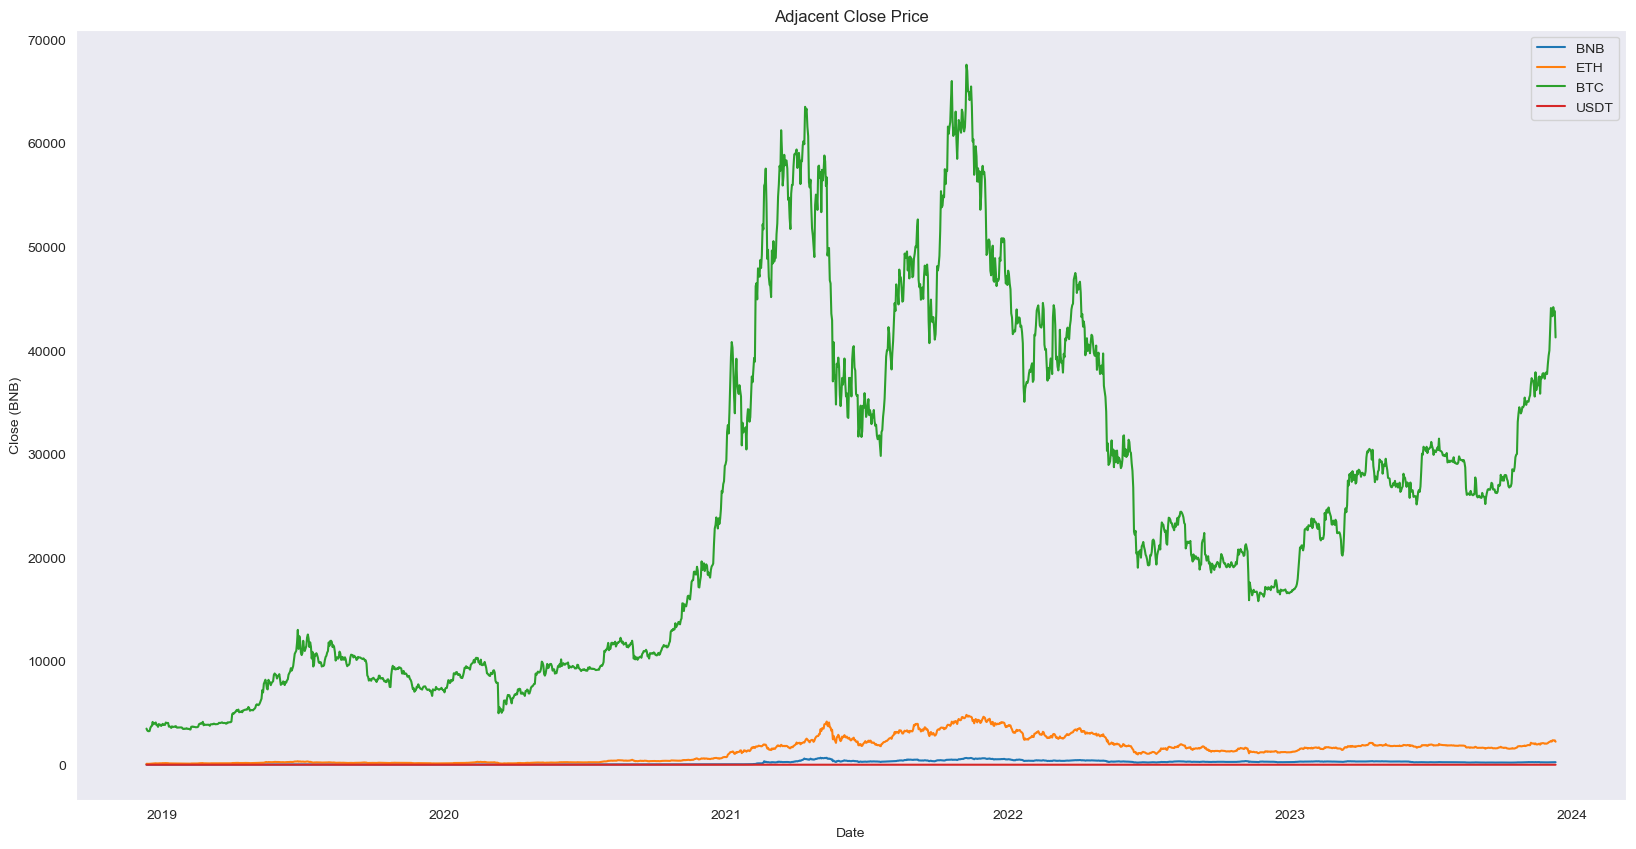

In [19]:
plt.figure(figsize = (20, 10))
sns.set_style('dark')
sns.lineplot(data = data['Close (BNB)'], label = 'BNB')
sns.lineplot(data = data['Close (ETH)'], label = 'ETH')
sns.lineplot(data = data['Close (BTC)'], label = 'BTC')
sns.lineplot(data = data['Close (USDT)'], label = 'USDT')
plt.title('Adjacent Close Price')

Text(0.5, 1.0, 'Volume')

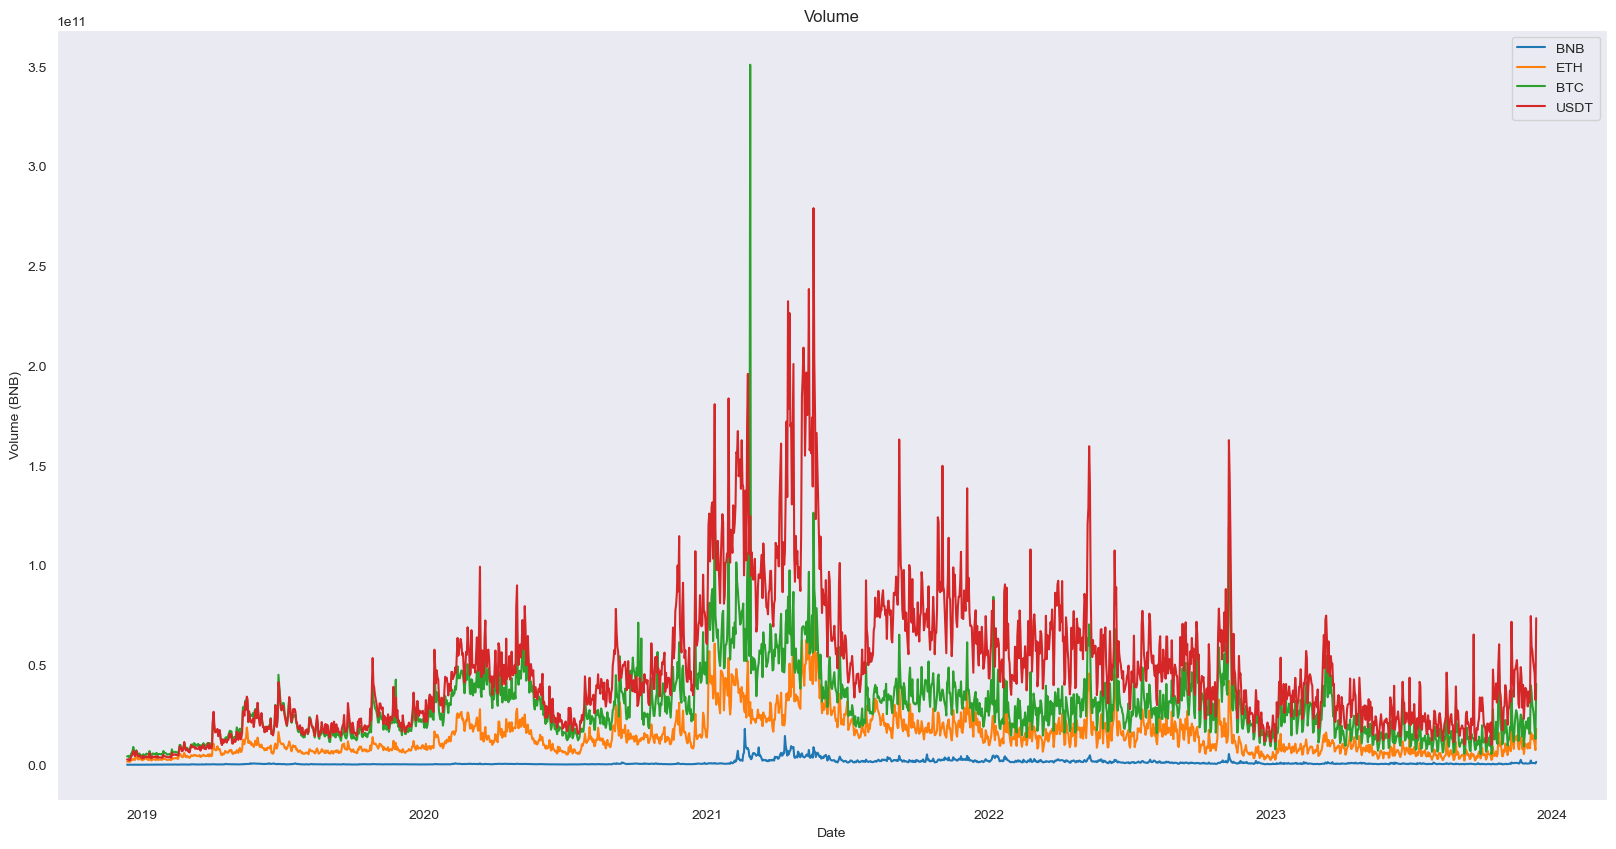

In [20]:
plt.figure(figsize = (20, 10))
sns.set_style('dark')
sns.lineplot(data = data['Volume (BNB)'], label = 'BNB')
sns.lineplot(data = data['Volume (ETH)'], label = 'ETH')
sns.lineplot(data = data['Volume (BTC)'], label = 'BTC')
sns.lineplot(data = data['Volume (USDT)'], label = 'USDT')
plt.title('Volume')

In [21]:
data_btc = data.loc[:,'Close (BTC)'].values
data_btc

array([ 3486.95019531,  3313.67724609,  3242.48486328, ...,
       43725.984375  , 43779.69921875, 41243.83203125])

In [22]:
import plotly.graph_objects as go
from datetime import datetime

temp = yf.Ticker('BTC-USD')
data_btc = btc.history(period='5y')

fig = go.Figure(data=[go.Candlestick(x=data_btc.index,
                open=data_btc['Open'],
                high=data_btc['High'],
                low=data_btc['Low'],
                close=data_btc['Close'])])

fig.show()

array([[<Axes: title={'center': 'Close (BTC)'}>,
        <Axes: title={'center': 'Volume (BTC)'}>,
        <Axes: title={'center': 'Close (ETH)'}>,
        <Axes: title={'center': 'Volume (ETH)'}>],
       [<Axes: title={'center': 'Close (USDT)'}>,
        <Axes: title={'center': 'Volume (USDT)'}>,
        <Axes: title={'center': 'Close (BNB)'}>,
        <Axes: title={'center': 'Volume (BNB)'}>]], dtype=object)

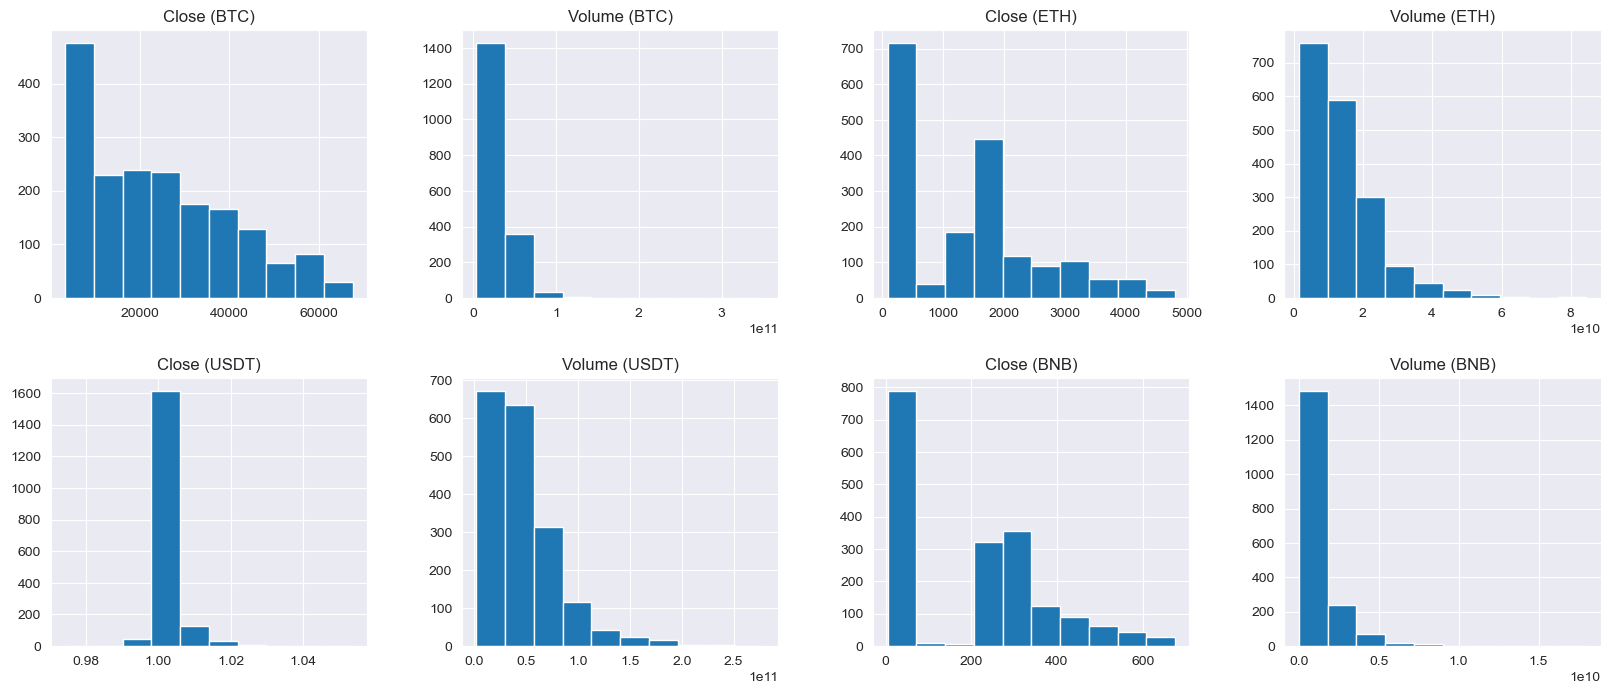

In [23]:
data.hist(figsize=(20, 8), layout=(2, 4))

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

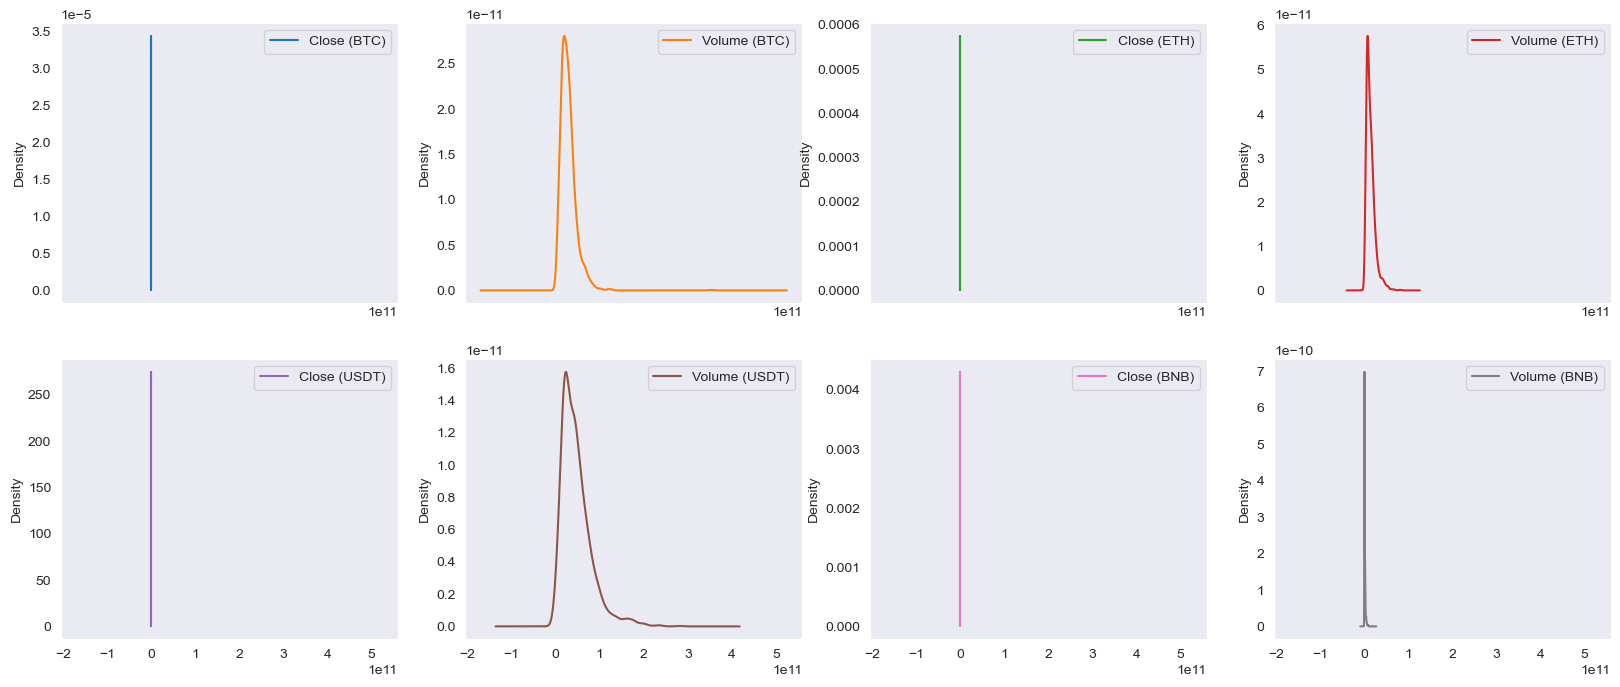

In [24]:
data.plot(kind = "kde", subplots = True, layout = (2, 4), figsize = (20, 8))

In [25]:
data.corr()

Close (BTC)  Volume (BTC)  Close (ETH)  Volume (ETH)  \
Close (BTC)       1.000000      0.390882     0.920355      0.518049   
Volume (BTC)      0.390882      1.000000     0.219191      0.822274   
Close (ETH)       0.920355      0.219191     1.000000      0.397043   
Volume (ETH)      0.518049      0.822274     0.397043      1.000000   
Close (USDT)     -0.339856     -0.220653    -0.324465     -0.216631   
Volume (USDT)     0.657081      0.838233     0.516800      0.930835   
Close (BNB)       0.861243      0.195582     0.952269      0.349552   
Volume (BNB)      0.690074      0.551514     0.570705      0.665809   

               Close (USDT)  Volume (USDT)  Close (BNB)  Volume (BNB)  
Close (BTC)       -0.339856       0.657081     0.861243      0.690074  
Volume (BTC)      -0.220653       0.838233     0.195582      0.551514  
Close (ETH)       -0.324465       0.516800     0.952269      0.570705  
Volume (ETH)      -0.216631       0.930835     0.349552      0.665809  
Close (USDT)       1.000000      -0.254334    -0.334640     -0.192591  
Volume (USDT)     -0.254334       1.000000     0.478260      0.753938  
Close (BNB)       -0.334640       0.478260     1.000000      0.611706  
Volume (BNB)      -0.192591       0.753938     0.611706      1.000000

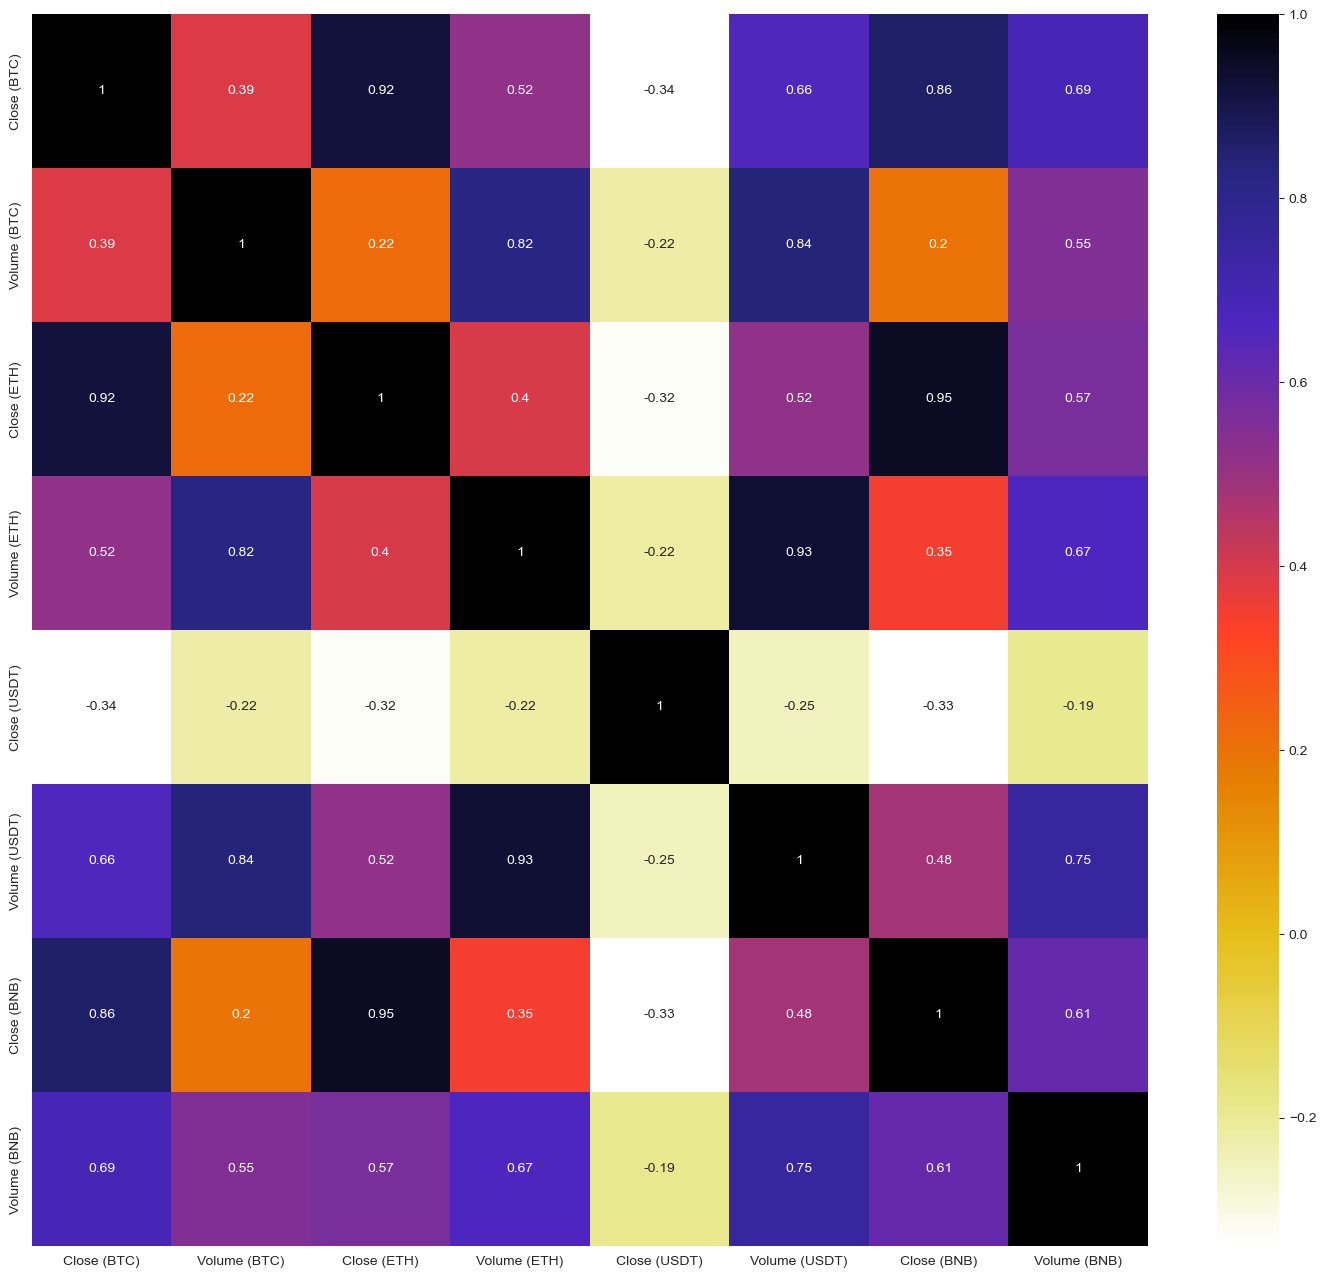

In [26]:
plt.figure(figsize=(18,16))
sns.heatmap(data.corr(), annot=True, cmap=plt.cm.CMRmap_r);

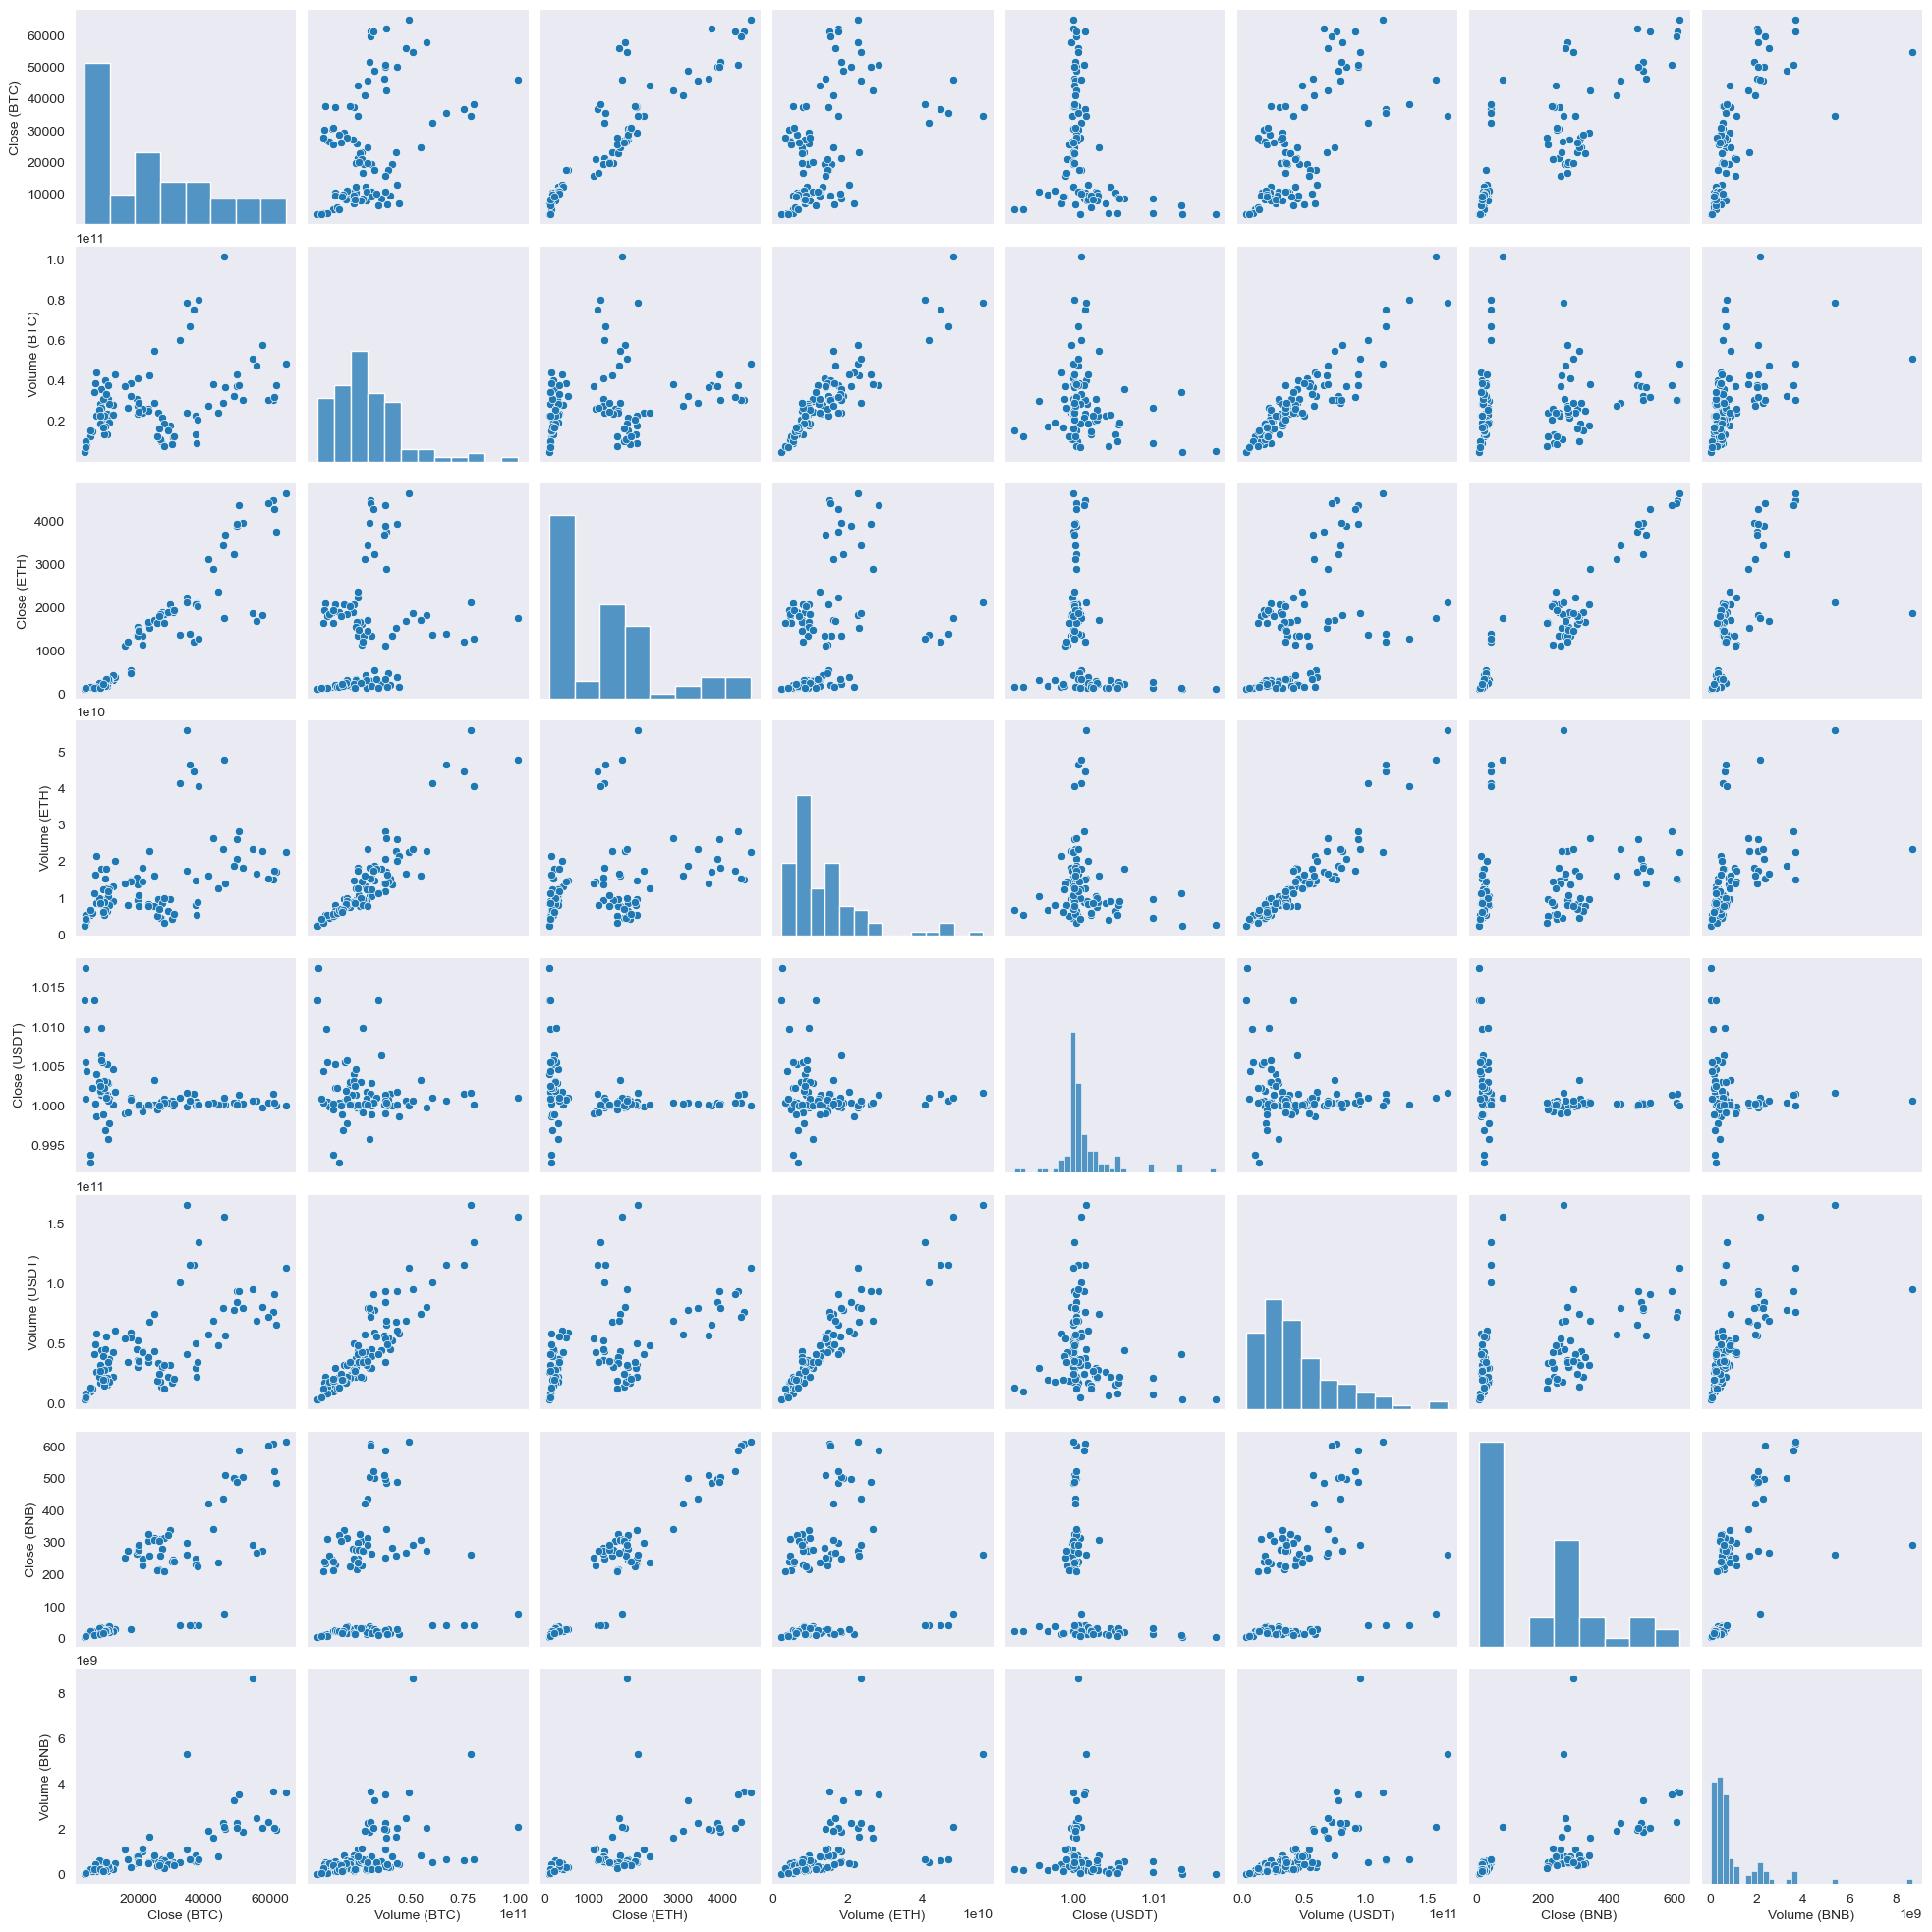

In [27]:
sns.pairplot(data.sample(n=100));

In [28]:
# import pandas_profiling
# pandas_profiling.ProfileReport(data)

In [29]:
# X = data.loc[:, ['Adj Close (BNB)', 'Adj Close (USDT)', 'Adj Close (ETH)']]
X = data.drop(columns = ['Close (BTC)'], axis = 1)
Y = data.loc[:, 'Close (BTC)']

In [30]:
X.head()

Volume (BTC)  Close (ETH)  Volume (ETH)  \
Date                                                                 
2018-12-12 00:00:00+00:00    4139364829    90.593300    1533050103   
2018-12-13 00:00:00+00:00    4343372456    86.539314    1754475622   
2018-12-14 00:00:00+00:00    4372763663    84.308296    1651491877   
2018-12-15 00:00:00+00:00    3551763561    84.440811    1496176898   
2018-12-16 00:00:00+00:00    3744248994    85.262100    1565817037   

                           Close (USDT)  Volume (USDT)  Close (BNB)  \
Date                                                                  
2018-12-12 00:00:00+00:00      1.009756     2623601152     5.023137   
2018-12-13 00:00:00+00:00      1.003378     2657124589     4.650704   
2018-12-14 00:00:00+00:00      1.002197     2751719689     4.533357   
2018-12-15 00:00:00+00:00      1.004989     2191631708     4.563012   
2018-12-16 00:00:00+00:00      1.006336     2322330505     4.645258   

                           Volume (BNB)  
Date                                     
2018-12-12 00:00:00+00:00      17783397  
2018-12-13 00:00:00+00:00      14503435  
2018-12-14 00:00:00+00:00      13544913  
2018-12-15 00:00:00+00:00      12572161  
2018-12-16 00:00:00+00:00      14565932

In [31]:
Y.head()

Date
2018-12-12 00:00:00+00:00    3486.950195
2018-12-13 00:00:00+00:00    3313.677246
2018-12-14 00:00:00+00:00    3242.484863
2018-12-15 00:00:00+00:00    3236.761719
2018-12-16 00:00:00+00:00    3252.839111
Name: Close (BTC), dtype: float64

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)

In [33]:
from sklearn.feature_selection import SelectKBest

fs = SelectKBest(k=4)
X_train = fs.fit_transform(X_train, Y_train)
X_test = fs.transform(X_test)

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [36]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor

In [37]:
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train, Y_train)

KNeighborsRegressor(n_neighbors=2)

In [38]:
rf = RandomForestRegressor()
rf.fit(X_train,Y_train)

RandomForestRegressor()

In [39]:
dt = tree.DecisionTreeRegressor()
dt.fit(X_train, Y_train)

DecisionTreeRegressor()

In [40]:
est = GradientBoostingRegressor()
est.fit(X_train, Y_train)

GradientBoostingRegressor()

In [41]:
Y_pred_neigh = neigh.predict(X_test)
r2neigh = metrics.r2_score(Y_test, Y_pred_neigh)

Y_pred_rf = rf.predict(X_test)
r2rf = metrics.r2_score(Y_test, Y_pred_rf)

Y_pred_dt = dt.predict(X_test)
r2dt = metrics.r2_score(Y_test, Y_pred_dt)

Y_pred_est = est.predict(X_test)
r2est = metrics.r2_score(Y_test, Y_pred_est)

In [42]:
print("*"*10, "Accuracy", "*"*10)

print("-"*30)
print("K nearest neighbors: ", r2neigh)
print("-"*30)


print("-"*30)
print("random forest: ", r2rf)
print("-"*30)


print("-"*30)
print("decision tree: ", r2dt)
print("-"*30)


print("-"*30)
print("gradient boosting: ", r2est)
print("-"*30)

********** Accuracy **********
------------------------------
K nearest neighbors:  0.893603780015968
------------------------------
------------------------------
random forest:  0.9315582906833657
------------------------------
------------------------------
decision tree:  0.9024197770776521
------------------------------
------------------------------
gradient boosting:  0.9238572554896549
------------------------------


In [43]:
# plt.figure(figsize = (20, 10))
# sns.set_style('darkgrid')
# sns.lineplot(x = X_test.index, y = Y_pred, label = "Predicted Price")
# sns.lineplot(x = X_test.index, y = Y_test, label = "Actual Price")
# plt.title('Actual vs Predicted values in test data')

In [44]:
# plt.figure(figsize = (20, 10))
# sns.set_style('darkgrid')
# sns.lineplot(x = X_train.index, y = rf.predict(X_train), label = "Predicted Price")
# sns.lineplot(x = X_train.index, y = Y_train, label = "Actual Price")
# plt.title('Actual vs Predicted values in training data')

In [45]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 100)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10, 200, num = 20)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [46]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 200, cv = 3, verbose=0, random_state=42, n_jobs = -1)
rf_random.fit(X_train, Y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110, 120,
                                                      130, 140, 150, 160, 170,
                                                      180, 190, 200, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 110,
                                                         120, 130, 140, 150,
                                                         160, 170, 180, 190,
                                                         200, 210, 220, 230,
                                                         240, 250, 260, 270,
                                                         280, 290, 300, ...]},
                   random_state=42)

In [47]:
rf_random.best_params_

{'n_estimators': 520,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 120,
 'bootstrap': True}

In [48]:
rf = RandomForestRegressor(**rf_random.best_params_)
rf.fit(X_train, Y_train)

Y_pred_rf = rf.predict(X_test)
r2rf = metrics.r2_score(Y_test, Y_pred_rf)

print("-"*30)
print("Accuracy: ", r2rf)
print("-"*30)

------------------------------
Accuracy:  0.93429113638507
------------------------------


In [52]:
!pip install shap

Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------- 448.0/448.0 kB 90.4 kB/s eta 0:00:00


In [58]:
import shap

In [59]:
shap.initjs()

In [60]:
shap_values = shap.TreeExplainer(rf).shap_values(X_test)

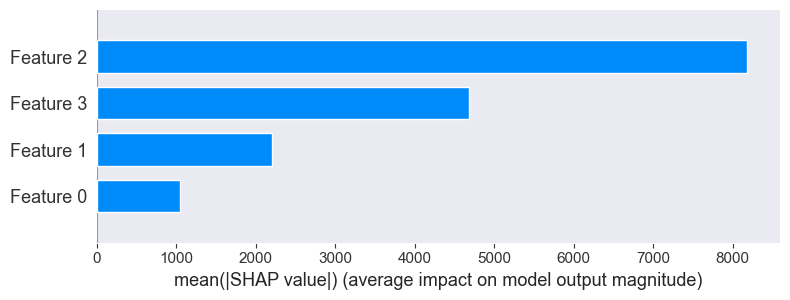

In [61]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

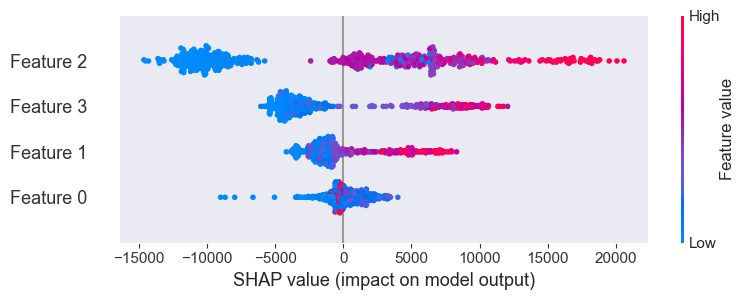

In [62]:
shap.summary_plot(shap_values, X_test)

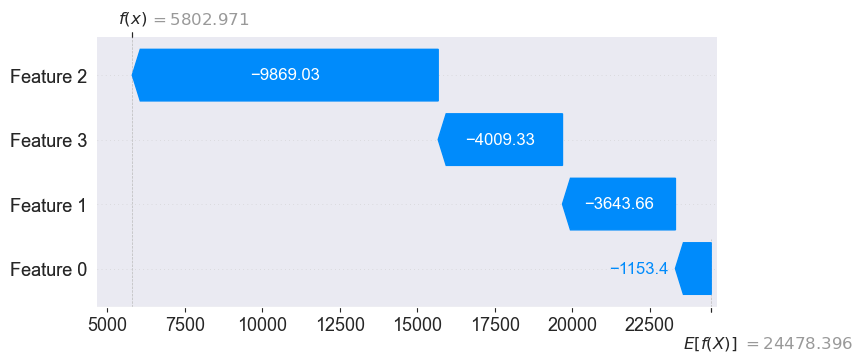

[0.36911014 0.02866775 0.02719483 0.01158641]


In [63]:
row = 111
shap.plots._waterfall.waterfall_legacy(shap.TreeExplainer(rf).expected_value[0], 
                                       shap_values[row],
                                      )

print(X_test[111])

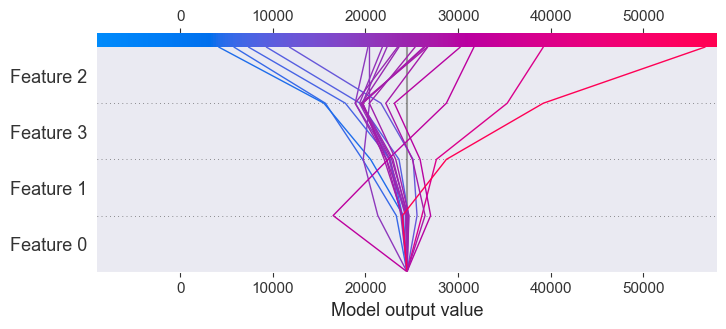

In [64]:
shap.decision_plot(shap.TreeExplainer(rf).expected_value[0], 
                   shap_values[110:130])

In [65]:
shap.force_plot(shap.TreeExplainer(rf).expected_value, shap_values[0:257], X_test[0:257])

In [66]:
original

Close (BTC)      4.193345e+04
Volume (BTC)     3.215270e+10
Close (ETH)      2.232973e+03
Volume (ETH)     1.392870e+10
Close (USDT)     9.999804e-01
Volume (USDT)    5.983558e+10
Close (BNB)      2.494676e+02
Volume (BNB)     1.509235e+09
Name: 2023-12-12 00:00:00+00:00, dtype: float64